In [105]:
import pandas as pd

df = pd.read_csv("Dataset Lomba Data Analytics TECHFEST 2025 - Sheet1.csv")

df.head(5)

,Provinsi,IPM,Pagu TKDD,Realisasi TKDD,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010
0,ACEH,"74,7","Rp 30.821.480.000.000,00","Rp 31.074.560.000.000,00",5.409.200,"5.744.760,78","14,45","227018,2",41.408.000,"4,23"
1,BALI,"78,01","Rp 11.152.110.000.000,00","Rp 11.064.980.000.000,00",4.374.300,"2.529.543,01","4,25","274358,18",62.294.000,"5,71"
2,BANTEN,"75,77","Rp 17.453.380.000.000,00","Rp 17.467.380.000.000,00",12.167.000,"1.435.635,74","6,17","814122,03",66.147.000,"4,81"
3,BENGKULU,"74,3","Rp 10.570.080.000.000,00","Rp 10.559.790.000.000,00",2.059.400,"5.127.605,13","14,04","96583,09",46.300.000,"4,28"
4,DI YOGYAKARTA,"81,09","Rp 10.355.870.000.000,00","Rp 10.241.290.000.000,00",3.712.600,"2.758.522,33","11,04","180696,04",48.360.000,"5,07"


In [106]:
df.isna().sum()

Provinsi                                                          0
IPM                                                               4
Pagu TKDD                                                         0
Realisasi TKDD                                                    0
Jumlah Penduduk                                                   2
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        4
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Provinsi                                                        38 non-null     object
 1   IPM                                                             34 non-null     object
 2   Pagu TKDD                                                       38 non-null     object
 3   Realisasi TKDD                                                  38 non-null     object
 4   Jumlah Penduduk                                                 36 non-null     object
 5   Anggaran APBN per kapita                                        38 non-null     object
 6   Persentase Penduduk Miskin                                      34 non-null     object
 7   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  

In [108]:
import re

def clean_currency(val):
    if pd.isna(val):
        return None
    # Hapus semua karakter non-digit
    digits = re.sub(r'[^\d]', '', str(val))
    return int(digits) / 100 if digits else None

# Terapkan ke dataframe
df['Pagu TKDD_clean'] = df['Pagu TKDD'].apply(clean_currency)
df['Realisasi TKDD_clean'] = df['Realisasi TKDD'].apply(clean_currency)

In [109]:
df['Realisasi TKDD_clean'].head(5)

df = df.drop(columns='Pagu TKDD')
df = df.drop(columns='Realisasi TKDD')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     object 
 2   Jumlah Penduduk                                                 36 non-null     object 
 3   Anggaran APBN per kapita                                        38 non-null     object 
 4   Persentase Penduduk Miskin                                      34 non-null     object 
 5   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  38 non-null     object 
 6   Produk Domestik Regional Bruto per Kapita HB                    38 non-null     object 
 7   Laju Pertumbuhan PDRB atas dasar konstan 2010          

In [ ]:
col_to_fix = ['IPM', 'Jumlah Penduduk', 'Anggaran APBN per kapita', 'Persentase Penduduk Miskin', 'Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku', 'Produk Domestik Regional Bruto per Kapita HB', 'Laju Pertumbuhan PDRB atas dasar konstan 2010']

for col in col_to_fix:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(".", "", regex=False)  
    df[col] = df[col].str.replace(",", ".", regex=False)  
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Provinsi                                                        38 non-null     object 
 1   IPM                                                             34 non-null     float64
 2   Jumlah Penduduk                                                 36 non-null     float64
 3   Anggaran APBN per kapita                                        35 non-null     float64
 4   Persentase Penduduk Miskin                                      34 non-null     float64
 5   Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku  38 non-null     float64
 6   Produk Domestik Regional Bruto per Kapita HB                    38 non-null     int64  
 7   Laju Pertumbuhan PDRB atas dasar konstan 2010          

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

df_imputed = df.copy()

numeric_cols = df_imputed.select_dtypes(include="number").columns.tolist()

missing_per_col = df_imputed[numeric_cols].isnull().sum()

cols_order = missing_per_col[missing_per_col > 0].sort_values(ascending=False).index.tolist()

print("Urutan kolom yang akan diimputasi:", cols_order)

iteration = 0
while df_imputed[numeric_cols].isnull().any().any():
    iteration += 1
    print(f"\nIterasi ke-{iteration}:")

    for col in cols_order:
        if df_imputed[col].isnull().sum() > 0:
            print(f"  Mengisi kolom: {col} (missing: {df_imputed[col].isnull().sum()})")

            available_features = [c for c in numeric_cols if c != col and df_imputed[c].notnull().sum() > 0]

            if not available_features:
                print(f"    Tidak ada fitur numerik lain yang lengkap, lewati kolom {col}.")
                continue

            tmp_df = df_imputed[[col] + available_features]

            imputer = KNNImputer(n_neighbors=5)
            tmp_imputed = pd.DataFrame(imputer.fit_transform(tmp_df), columns=tmp_df.columns, index=tmp_df.index)

            df_imputed[col] = tmp_imputed[col]

    total_missing = df_imputed[numeric_cols].isnull().sum().sum()
    print(f"  Total missing tersisa setelah iterasi ke-{iteration}: {total_missing}")

    if total_missing == 0:
        print("\nSemua missing value sudah berhasil diimputasi!")
        break

df_imputed.to_csv("dataset_imputed.csv", index=False)
print("\nDataset dengan imputasi sudah disimpan sebagai 'dataset_imputed.csv'.")


Urutan kolom yang akan diimputasi: ['IPM', 'Persentase Penduduk Miskin', 'Anggaran APBN per kapita', 'Jumlah Penduduk', 'Pagu TKDD_clean', 'Realisasi TKDD_clean']

Iterasi ke-1:
  Mengisi kolom: IPM (missing: 4)
  Mengisi kolom: Persentase Penduduk Miskin (missing: 4)
  Mengisi kolom: Anggaran APBN per kapita (missing: 3)
  Mengisi kolom: Jumlah Penduduk (missing: 2)
  Mengisi kolom: Pagu TKDD_clean (missing: 1)
  Mengisi kolom: Realisasi TKDD_clean (missing: 1)
  Total missing tersisa setelah iterasi ke-1: 0

Semua missing value sudah berhasil diimputasi!

Dataset dengan imputasi sudah disimpan sebagai 'dataset_imputed.csv'.


In [114]:
df_new = pd.read_csv('dataset_imputed.csv')
df_new.isna().sum()

Provinsi                                                          0
IPM                                                               0
Jumlah Penduduk                                                   0
Anggaran APBN per kapita                                          0
Persentase Penduduk Miskin                                        0
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku    0
Produk Domestik Regional Bruto per Kapita HB                      0
Laju Pertumbuhan PDRB atas dasar konstan 2010                     0
Pagu TKDD_clean                                                   0
Realisasi TKDD_clean                                              0
dtype: int64

In [ ]:
df_new["APBN_perkapita_hitungan"] = df_new["Realisasi TKDD_clean"] / df_new["Jumlah Penduduk"]
df_new["abs_error"] = (df_new["Anggaran APBN per kapita"] - df_new["APBN_perkapita_hitungan"]).abs()

mean_apbn = df_new["Anggaran APBN per kapita"].mean()
std_apbn = df_new["Anggaran APBN per kapita"].std()
mean_abs_error = df_new["abs_error"].mean()
mape = (df_new["abs_error"] / df_new["Anggaran APBN per kapita"]).mean() * 100

print(f"Rata-rata APBN per kapita: Rp{mean_apbn:,.0f}")
print(f"Standard deviasi: Rp{std_apbn:,.0f}")
print(f"Rata-rata error absolut: Rp{mean_abs_error:,.0f}")
print(f"MAPE: {mape:.2f}%")


Rata-rata APBN per kapita: Rp5,244,277
Standard deviasi: Rp3,800,072
Rata-rata error absolut: Rp110,164
MAPE: 1.47%


In [ ]:
df_new["APBN_perkapita_hitungan"] = df_new["Realisasi TKDD_clean"] / df_new["Jumlah Penduduk"]

df_new["abs_error"] = (df_new["Anggaran APBN per kapita"] - df_new["APBN_perkapita_hitungan"]).abs()

mean_apbn = df_new["Anggaran APBN per kapita"].mean()
std_apbn = df_new["Anggaran APBN per kapita"].std()
mean_abs_error = df_new["abs_error"].mean()
mape = (df_new["abs_error"] / df_new["Anggaran APBN per kapita"]).mean() * 100

print(f"Rata-rata APBN per kapita: Rp{mean_apbn:,.0f}")
print(f"Standard deviasi: Rp{std_apbn:,.0f}")
print(f"Rata-rata error absolut: Rp{mean_abs_error:,.0f}")
print(f"MAPE: {mape:.2f}%")


Rata-rata APBN per kapita: Rp5,244,277
Standard deviasi: Rp3,800,072
Rata-rata error absolut: Rp110,164
MAPE: 1.47%


In [ ]:
for i in range(len(df_new)):
    print(df_new['Provinsi'][i])
    df_new["APBN_perkapita_hitungan"][i] = df_new["Realisasi TKDD_clean"][i] / df_new["Jumlah Penduduk"][i]

    print(df_new['APBN_perkapita_hitungan'][i])

    df_new["abs_error"] = (df_new["Anggaran APBN per kapita"][i] - df_new["APBN_perkapita_hitungan"][i])

    mean_apbn = df_new["Anggaran APBN per kapita"][i]
    mean_abs_error = df_new["abs_error"][i]
    mape = (df_new["abs_error"][i] / df_new["Anggaran APBN per kapita"][i]).mean() * 100

    print(f"Rata-rata error absolut: Rp{mean_abs_error:,.0f}")
    print(f"MAPE: {mape:.2f}%")
    print()


ACEH
5744760.77793389
Rata-rata error absolut: Rp0
MAPE: 0.00%

BALI
2529543.0125963013
Rata-rata error absolut: Rp-0
MAPE: -0.00%

BANTEN
1435635.7360072327
Rata-rata error absolut: Rp0
MAPE: 0.00%

BENGKULU
5127605.1277071
Rata-rata error absolut: Rp0
MAPE: 0.00%

DI YOGYAKARTA
2758522.3293648656
Rata-rata error absolut: Rp0
MAPE: 0.00%

DKI JAKARTA
2357159.77443609
Rata-rata error absolut: Rp-0
MAPE: -0.00%

GORONTALO
5136356.809078772
Rata-rata error absolut: Rp0
MAPE: 0.00%

JAMBI
4225660.574699989
Rata-rata error absolut: Rp-0
MAPE: -0.00%

JAWA BARAT
1440606.3666674779
Rata-rata error absolut: Rp0
MAPE: 0.00%

JAWA TENGAH
1795894.0732213748
Rata-rata error absolut: Rp-0
MAPE: -0.00%

JAWA TIMUR
1986948.581130245
Rata-rata error absolut: Rp-0
MAPE: -0.00%

KALIMANTAN BARAT
380044.3267203633
Rata-rata error absolut: Rp0
MAPE: 0.00%

KALIMANTAN SELATAN
838815.4045369526
Rata-rata error absolut: Rp-0
MAPE: -0.00%

KALIMANTAN TENGAH
10544428.613181353
Rata-rata error absolut: Rp-0
MA

C:\Users\hansc\AppData\Local\Temp\ipykernel_22952\405645001.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_new["APBN_perkapita_hitungan"][i] = df_new["Realisasi TKDD_clean"][i] / df_new["Jumlah Penduduk"][i]
C:\Users\hansc\AppData\Lo

In [118]:
df_new

,Provinsi,IPM,Jumlah Penduduk,Anggaran APBN per kapita,Persentase Penduduk Miskin,Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku,Produk Domestik Regional Bruto per Kapita HB,Laju Pertumbuhan PDRB atas dasar konstan 2010,Pagu TKDD_clean,Realisasi TKDD_clean,APBN_perkapita_hitungan,abs_error
0,ACEH,74.700,5409200.0,5.744761e+06,14.450,227018.20,41408000,4.23,3.082148e+13,3.107456e+13,5.744761e+06,0.002307
1,BALI,78.010,4374300.0,2.529543e+06,4.250,274358.18,62294000,5.71,1.115211e+13,1.106498e+13,2.529543e+06,0.002307
2,BANTEN,75.770,12167000.0,1.435636e+06,6.170,814122.03,66147000,4.81,1.745338e+13,1.746738e+13,1.435636e+06,0.002307
3,BENGKULU,74.300,2059400.0,5.127605e+06,14.040,96583.09,46300000,4.28,1.057008e+13,1.055979e+13,5.127605e+06,0.002307
4,DI YOGYAKARTA,81.090,3712600.0,2.758522e+06,11.040,180696.04,48360000,5.07,1.035587e+13,1.024129e+13,2.758522e+06,0.002307
5,DKI JAKARTA,83.550,10640000.0,2.357160e+06,4.440,3443026.23,322619000,4.96,2.469499e+13,2.508018e+13,2.357160e+06,0.002307
6,GORONTALO,71.250,1198400.0,5.136357e+06,15.150,51366.74,42341000,4.50,6.172420e+12,6.155410e+12,5.136357e+06,0.002307
7,JAMBI,73.730,3633200.0,4.225661e+06,7.580,293780.01,79850000,4.67,1.523207e+13,1.535267e+13,4.225661e+06,0.002307
8,JAWA BARAT,74.240,49306800.0,1.440606e+06,7.620,2625225.72,52652000,5.00,7.132176e+13,7.103169e+13,1.440606e+06,0.002307
9,JAWA TENGAH,73.390,37180400.0,1.795894e+06,10.770,1695621.57,45167000,4.97,6.712969e+13,6.677206e+13,1.795894e+06,0.002307


<AxesSubplot:>

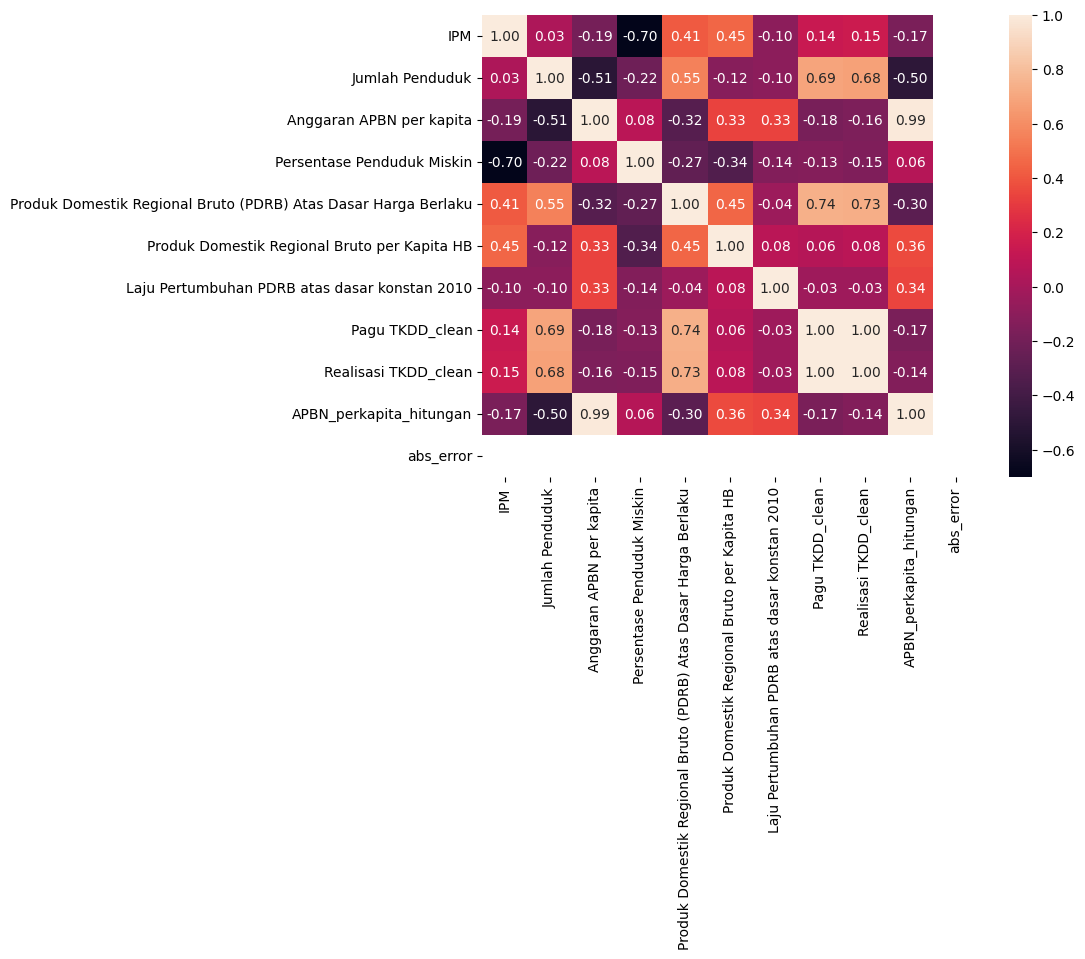

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_col = df_new.select_dtypes(include=['number']).columns

correlation = df_new[num_col].corr().round(2)

plt.figure(figsize=[8,6])
sns.heatmap(correlation, fmt='.2f', annot=True)

In [ ]:
from scipy.stats import pearsonr

target = "Realisasi TKDD_clean"

for col in df_new.select_dtypes(include='number').columns:
    if col != target:
        if df_new[col].nunique() > 1:
            r, p_value = pearsonr(df_new[col], df_new[target])
            print("="*50)
            print(col)
            print(f'Koefisien Korelasi Pearson: {r}')
            print(f'P-value: {p_value:.8f}')


IPM
Koefisien Korelasi Pearson: 0.15066343851553576
P-value: 0.36658121
Jumlah Penduduk
Koefisien Korelasi Pearson: 0.6802536038365199
P-value: 0.00000262
Anggaran APBN per kapita
Koefisien Korelasi Pearson: -0.157645920824655
P-value: 0.34452589
Persentase Penduduk Miskin
Koefisien Korelasi Pearson: -0.14949690231190663
P-value: 0.37034631
Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku
Koefisien Korelasi Pearson: 0.7335638878750145
P-value: 0.00000016
Produk Domestik Regional Bruto per Kapita HB
Koefisien Korelasi Pearson: 0.08210856685057447
P-value: 0.62408291
Laju Pertumbuhan PDRB atas dasar konstan 2010
Koefisien Korelasi Pearson: -0.02992431449618598
P-value: 0.85845318
Pagu TKDD_clean
Koefisien Korelasi Pearson: 0.9981997789323682
P-value: 0.00000000
APBN_perkapita_hitungan
Koefisien Korelasi Pearson: -0.14173917985976595
P-value: 0.39596524


Dari korelasi matrix di atas, bisa dilihat bahwa realisasi TKDD dan pagu TKDD memiliki keterkaitan yang kuat ini sesuai karna realisasi TKDD pasti akan menyesuaikan juga dengan pagu TKDD yang sudah ditentukan. Lalu untuk IPM dan persentase penduduk miskin memiliki korelasi terbalik (negatif) yang berarti IPM yang tinggi menunjukkan bahwa persentase penduduk miskin pada sebuah daerah rendah karena Pemanfaatan sumber daya pada manusia lebih tinggi sedangkan realisasi TKDD tidak memiliki korelasi yang tinggi terhadap IPM yang bisa mengartikan bahwa banyaknya dana TKDD yang terealisasi tidak menjamin peningkatan IPMnya. Matriks korelasi ini juga bisa menunjukkan beberapa faktor yang cukup mempengaruhi TKKD yaitu jumlah penduduk dan PDRB Atas Dasar Harga Berlaku. 

Dari uji pearson yang dilakukan untuk setiap fitur pada dataset terhadap Realisasi TKDD, didapati hanya Jumlah Penduduk, Produk Domestik Regional Bruto (PDRB) Atas Dasar Harga Berlaku, dan Pagu TKDD yang memiliki nilai-p lebih kecil dari 0.05 untuk menolak Hipotesis 0 (Tidak ada hubungan linier antara kedua fitur) yang berarti, ketiga fitur itu memiliki hubungan dengan target fitur, Realisasi TKDD. 

Jumlah Penduduk memiliki koefisien korelasi Pearson sebesar 0.68 yang menunjukkan korelasi sedang dengan target. Hasil p-value yang sangat kecil menunjukkan adanya hubungan signifikan antara kedua fitur tersebut.  

Fitur PDRB Atas Dasar Harga Berlaku memiliki koefisien korelasi Pearson sebesar 0.73356 yang menunjukkan korelasi kuat dengan target. Hasil p-value yang sangat kecil menunjukkan adanya hubungan signifikan antara kedua fitur tersebut.  

Fitur Pagu TKDD memiliki koefisien korelasi Pearson sebesar 0.99 yang menunjukkan korelasi sangat kuat dengan target. Hasil p-value yang sangat kecil menunjukkan adanya hubungan signifikan antara kedua fitur tersebut. Pagu TKDD sendiri memang menjadi acuan dalam realisasi TKDD, sehingga korelasinya sangat kuat antara kedua fitur ini. 


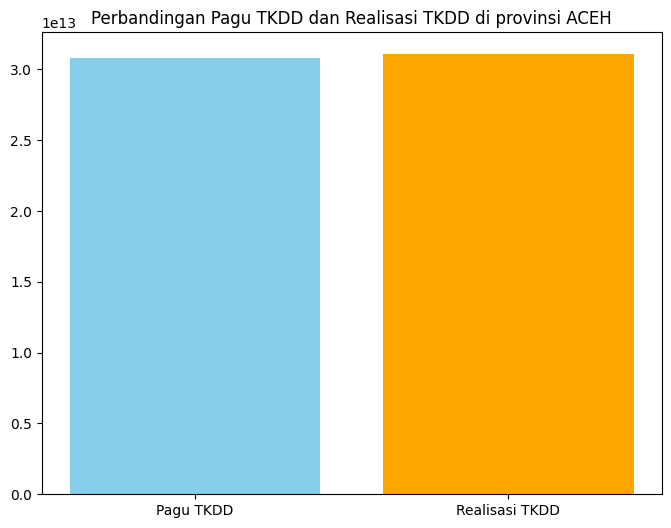

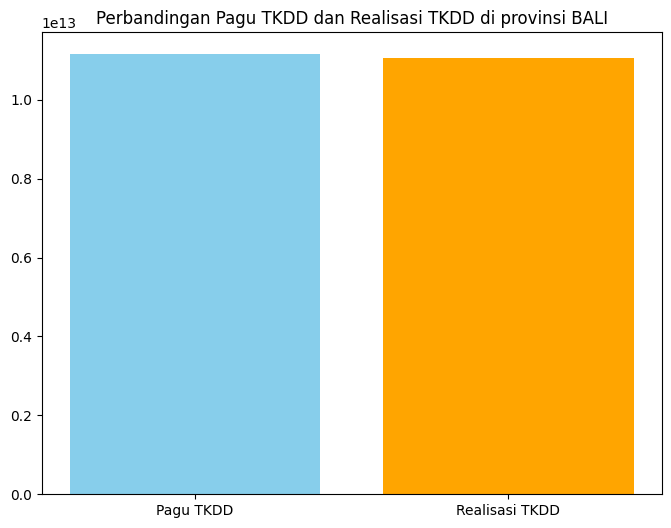

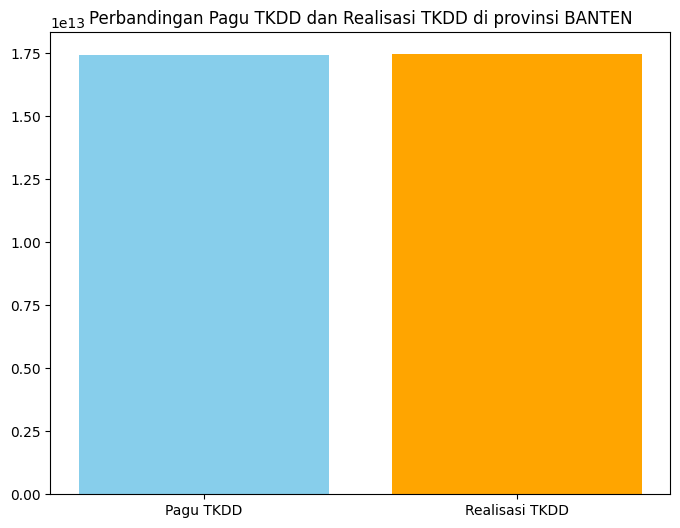

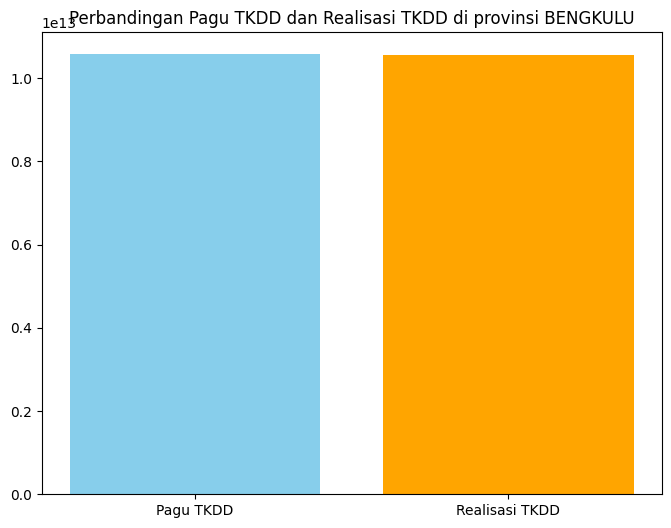

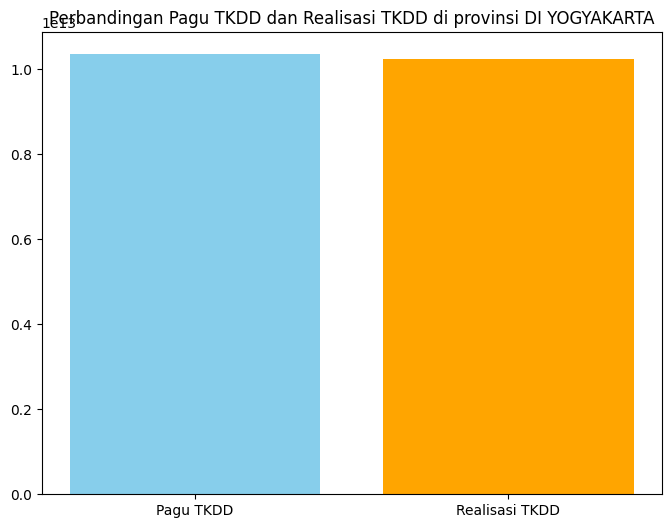

In [122]:

#Visualize 5 province with their respective pagu and realization

for idx, data in df_new.head(5).iterrows():
    if not pd.isna(data['Pagu TKDD_clean']) and not pd.isna(data['Realisasi TKDD_clean']):
        plt.figure(figsize=[8, 6])
        plt.bar(['Pagu TKDD', 'Realisasi TKDD'], [data['Pagu TKDD_clean'], data['Realisasi TKDD_clean']], color=['skyblue', 'orange'])
        plt.title(f'Perbandingan Pagu TKDD dan Realisasi TKDD di provinsi {data["Provinsi"]}')
        plt.show()


In [ ]:
def ratio(val_1, val_2):
    return (val_1 / val_2) * 100

df_new['ratio'] = df_new.apply(lambda row: ratio(row['Realisasi TKDD_clean'], row['Pagu TKDD_clean']), axis=1)

In [ ]:
clean = df_new.dropna()
length = len(clean)
print(length)

total = 0
cleaned = df_new['ratio'].dropna()

for val in cleaned:
    total += val

mean = total / length
print(f'Rata-rata ratio realisasi TKDD: {round(mean, 2)}%')

38
Rata-rata ratio realisasi TKDD: 100.98%


In [ ]:
class_1 = []
class_2 = []
class_3 = []

for name, ratio in zip(df_new['Provinsi'], df_new['ratio']):
    if ratio < 90:
        class_1.append(name)
    elif ratio >= 90 and ratio < 100:
        class_2.append(name)
    else:
        class_3.append(name)

print(f'Provinsi yang memiliki ratio TKKD kurang dari 90% adalah: ')
for name in class_1:
    print(f'{name}: {round(df_new.loc[df_new['Provinsi'] == name, 'ratio'].values[0], 2)}%') 
print()
print(f'Provinsi yang memiliki ratio TKKD 90% - 100% adalah: ')
for name in class_2:
    print(f'{name}: {round(df_new.loc[df_new['Provinsi'] == name, 'ratio'].values[0], 2)}%') 
print()
print(f'Provinsi yang memiliki ratio TKKD lebih dari 100% adalah: ')
for name in class_3:
    print(f'{name}: {round(df_new.loc[df_new['Provinsi'] == name, 'ratio'].values[0], 2)}%')  

Provinsi yang memiliki ratio TKKD kurang dari 90% adalah: 

Provinsi yang memiliki ratio TKKD 90% - 100% adalah: 
BALI: 99.22%
BENGKULU: 99.9%
DI YOGYAKARTA: 98.89%
GORONTALO: 99.72%
JAWA BARAT: 99.59%
JAWA TENGAH: 99.47%
JAWA TIMUR: 99.89%
KEP. BANGKA BELITUNG: 99.42%
MALUKU: 99.31%
NUSA TENGGARA BARAT: 99.8%
NUSA TENGGARA TIMUR: 99.45%
PAPUA: 94.32%
PAPUA BARAT DAYA: 99.69%
PAPUA PEGUNUNGAN: 94.67%
PAPUA SELATAN: 94.6%
SULAWESI BARAT: 99.37%
SULAWESI SELATAN: 99.68%
SULAWESI UTARA: 96.16%
SUMATERA BARAT: 99.17%

Provinsi yang memiliki ratio TKKD lebih dari 100% adalah: 
ACEH: 100.82%
BANTEN: 100.08%
DKI JAKARTA: 101.56%
JAMBI: 100.79%
KALIMANTAN BARAT: 101.41%
KALIMANTAN SELATAN: 110.59%
KALIMANTAN TENGAH: 104.23%
KALIMANTAN TIMUR: 110.98%
KALIMANTAN UTARA: 105.45%
KEP. RIAU: 109.78%
LAMPUNG: 100.09%
MALUKU UTARA: 100.72%
PAPUA BARAT: 102.73%
PAPUA TENGAH: 103.79%
RIAU: 104.29%
SULAWESI TENGAH: 101.0%
SULAWESI TENGGARA: 101.86%
SUMATERA SELATAN: 104.63%
SUMATERA UTARA: 100.02%


Setelah memperoleh rasio realisasi TKDD dari semua provinsi, bisa dilihat bahwa tidak ada daerah yang memiliki realisasi dibawah 90% dimana ini merupakan hal yang cukup baik, kemudian cukup banyak daerah yang memiliki realisasi di atas 100%, ini menandakan bahwa adanya perubaha apbn atau revisi yang terjadi, namun seperti analisa di atas mengenai relasi IPM dengan realisasi TKDD, banyaknya anggaran yang digunakan tidak selalu menjamin IPM yang meningkat sehingga pemerintah harus bisa menyerap dana yang diterima dengan baik atau melakukan evaluasi kebijakan dimana justru IPM lebih dipengaruhi oleh angka kemiskinan pada daerah tersebut sehingga pemanfaatan dana dalam meningkatkan kesejahteraan masyarakat bisa membantu dalam meningkatkan IPM karena pada data yang ada sekarang, korelasi antara persentase kemiskinan dan realisasi TKDD masih cukup lemah.